In [ ]:
from google.colab import drive; drive.mount('/content/drive')

#Import libraries
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import IPython.display as ipd
import networkx as nx

Mounted at /content/drive


In [ ]:
#Read data from the csv files and display
articles = pd.read_csv("/content/drive/MyDrive/Group 3/articles.leptospirosis.csv")
ipd.display(articles)

authors = pd.read_csv("/content/drive/MyDrive/Group 3/authors.leptospirosis.csv")
ipd.display(authors)

papercount = pd.read_csv("/content/drive/MyDrive/Group 3/paper_counts.csv")
ipd.display(papercount)


,PMID,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation
0,10548299,Risk factors for death and changing patterns i...,The risk factors for death and changes in clin...,0002-9637,The American journal of tropical medicine and ...,(61) 630-4,1999,E,Daher,E,"Departamento de Medicina Clínica, Faculdade de..."
1,10569777,Leptospiral outer membrane proteins OmpL1 and ...,New vaccine strategies are needed for preventi...,0019-9567,Infection and immunity,(67) 6572-82,1999,D A,Haake,DA,"Division of Infectious Diseases, Veterans Affa..."
2,10585813,Acute lung injury in leptospirosis: clinical a...,Forty-two consecutive patients with leptospiro...,1058-4838,Clinical infectious diseases : an official pub...,(29) 1561-3,1999,P C,Marotto,PC,"Intensive Care Unit, Instituto de Infectologia..."
3,10586903,Assessment of the efficacy of an IgM-elisa and...,In a prospective study in Barbados between 197...,0002-9637,The American journal of tropical medicine and ...,(61) 731-4,1999,P,Cumberland,P,"Infectious Disease Epidemiology Unit, London S..."
4,10596270,[An old disease with a new face: canine leptos...,The clinical features of the disease are prese...,0036-7281,Schweizer Archiv fur Tierheilkunde,(141) 499-507,1999,A,Steger-Lieb,A,"Klinik für kleine Haustiere, Universität Bern."
...,...,...,...,...,...,...,...,...,...,...,...
3384,38058661,Deeply jaundiced: Not so surgical after all.,Leptospirosis is an under-recognised disease i...,2313-1810,Southern African journal of infectious diseases,(38) 559,2023,Wesley P,du Plessis,WP,"Division of General Internal Medicine, Faculty..."
3385,38074946,Leptospirosis seroprevalence and risk factors ...,The objectives of this study were to determine...,2772-7076,IJID regions,(9) 125-130,2023,Sylvie,Zida,S,Institut de Recherche en Sciences de la Santé ...
3386,38081475,Leptospiral lipopolysaccharide dampens inflamm...,Leptospira interrogans are pathogenic bacteria...,1769-714X,Microbes and infection,S1286-4579(23)00184-3,2023,Delphine,Bonhomme,D,"Institut Pasteur, Université Paris Cité, CNRS ..."
3387,38087323,"Leptospirosis in Malaysia: current status, ins...","Among zoonotic infections, leptospirosis has a...",1880-6805,Journal of physiological anthropology,(42) 30,2023,Noraini,Philip,N,"School of Biological Sciences, Universiti Sain..."


,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation
0,10548299,1,E,Daher,E,"Departamento de Medicina Clínica, Faculdade de..."
1,10548299,2,D M,Zanetta,DM,NaN
2,10548299,3,M B,Cavalcante,MB,NaN
3,10548299,4,R C,Abdulkader,RC,NaN
4,10569777,1,D A,Haake,DA,"Division of Infectious Diseases, Veterans Affa..."
...,...,...,...,...,...,...
21326,38081475,7,Catherine,Werts,C,"Institut Pasteur, Université Paris Cité, CNRS ..."
21327,38087323,1,Noraini,Philip,N,"School of Biological Sciences, Universiti Sain..."
21328,38087323,2,Kamruddin,Ahmed,K,"Department of Pathology and Microbiology, Facu..."
21329,38094659,1,Guan-Sheng,Li,GS,"Department of Critical Medicine, Daomenkou, Ch..."


,Year,Count
0,1799,1
1,1801,1
2,1802,1
3,1805,1
4,1866,1
...,...,...
138,2020,1132241
139,2021,1277048
140,2022,1324650
141,2023,1302390


In [ ]:
#Merge the articles and authors dataframes, so the articles show have all authors
fullauthors = pd.merge(articles, authors, on='PMID')

#Create a full name column using initials and last name
fullauthors["AuthorFullname"] = fullauthors['AuthorInitials'] + " " + fullauthors["AuthorLastname"]

#Create a first author full name column
fullauthors["FirstAuthorFullname"] = fullauthors["FirstAuthorInitials"] + " " + fullauthors["FirstAuthorLastname"]

    AuthorFullname  count
0            AI Ko     86
1      M Picardeau     78
2      W Lilenbaum     77
3   OA Dellagostin     60
4          MG Reis     57
5  SA Vasconcellos     56
6    RA Hartskeerl     56
7        N Koizumi     56
8          F Costa     41
9        C Goarant     41


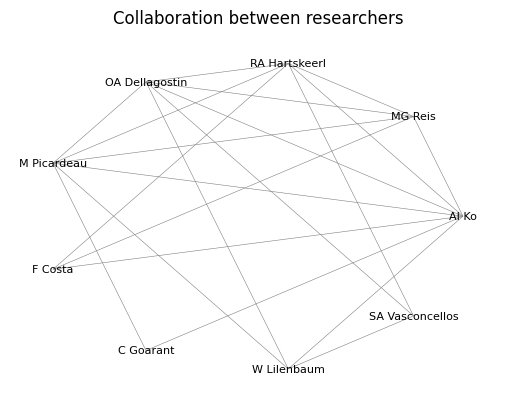

In [ ]:
#Identify the 10 authors who have published most articles
frequentauthors = (fullauthors['AuthorFullname'].value_counts()[:10]).reset_index()
print(frequentauthors)

#Empty dataframe for concatenating
fulldf = pd.DataFrame()

#Loop so each top 10 name will be added
for i in range(10):
  #Dataframe containing all lines where the author is that top 10 name
  df = pd.DataFrame(fullauthors[fullauthors["AuthorFullname"] == (frequentauthors["AuthorFullname"].iloc[i])])
  #Dataframe containing all of the papers where that author was listed
  df2 = pd.DataFrame(fullauthors[fullauthors["PMID"].isin(df["PMID"])])
  #Add a row with that author name
  df2["CopyName"] = frequentauthors["AuthorFullname"].iloc[i]
  #Dataframe containing all authors on those papers that are in the top 10 authors
  df3 = pd.DataFrame(df2[df2["AuthorFullname"].isin(frequentauthors["AuthorFullname"])])
  #Removing collaborations between the author and themself
  df3 = pd.DataFrame(df3[df3["AuthorFullname"] != df3["CopyName"]])

  #Concetenating that dataframe to the total dataframe
  fulldf = pd.concat([fulldf,df3])

#Creating the network of collaboration between authors
authornetwork = nx.from_pandas_edgelist(fulldf, 'CopyName', 'AuthorFullname')

#Adding title
plt.title("Collaboration between researchers")

#Drawing the network and adjusting how it looks
nx.draw(authornetwork, with_labels=True,
        node_size=0,
        node_shape="o",
        node_color="black",
        linewidths=1,
        width=0.4,
        font_size=8,
        font_color="black",
        edge_color="gray", pos=nx.circular_layout(authornetwork))

#Saving the network
plt.savefig("AuthorCollab10.jpeg")


          AuthorFullname  count
0                  AI Ko     86
1            M Picardeau     78
2            W Lilenbaum     77
3         OA Dellagostin     60
4                MG Reis     57
5        SA Vasconcellos     56
6          RA Hartskeerl     56
7              N Koizumi     56
8                F Costa     41
9              C Goarant     41
10                 J Yan     39
11             JM Vinetz     39
12              DA Haake     38
13             EC Romero     38
14         P Vijayachari     37
15              JE Nally     37
16  K Natarajaseenivasan     36
17              P Bourhy     36
18             EA Wunder     32
19             LD Smythe     32
20              YF Chang     31
21               B Adler     30
22              SB Craig     29
23          MB Heinemann     28
24             G Martins     27
25         AL Nascimento     26
26              C Hamond     26
27            DD Hartwig     25
28             ML Vieira     25
29            J Benschop     24


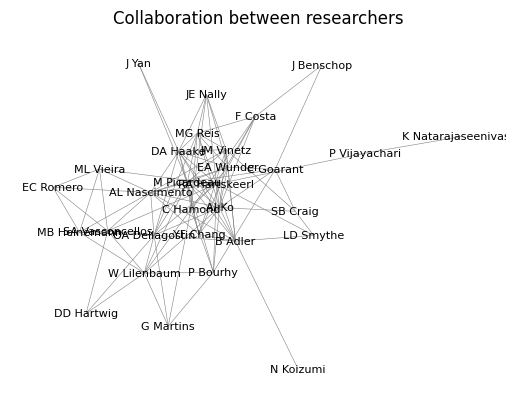

In [ ]:
#Identify the 30 authors who have published most articles
frequentauthors = (fullauthors['AuthorFullname'].value_counts()[:30]).reset_index()
print(frequentauthors)

#Empty dataframe for concatenating
fulldf = pd.DataFrame()

#Loop so each top 30 name will be added
for i in range(30):
  #Dataframe containing all lines where the author is that top 10 name
  df = pd.DataFrame(fullauthors[fullauthors["AuthorFullname"] == (frequentauthors["AuthorFullname"].iloc[i])])
  #Dataframe containing all of the papers where that author was listed
  df2 = pd.DataFrame(fullauthors[fullauthors["PMID"].isin(df["PMID"])])
  #Add a row with that author name
  df2["CopyName"] = frequentauthors["AuthorFullname"].iloc[i]
  #Dataframe containing all authors on those papers that are in the top 10 authors
  df3 = pd.DataFrame(df2[df2["AuthorFullname"].isin(frequentauthors["AuthorFullname"])])
  #Removing collaborations between the author and themself
  df3 = pd.DataFrame(df3[df3["AuthorFullname"] != df3["CopyName"]])

  #Concetenating that dataframe to the total dataframe
  fulldf = pd.concat([fulldf,df3])

#Creating the network of collaboration between authors
authornetwork = nx.from_pandas_edgelist(fulldf, 'CopyName', 'AuthorFullname')

#Adding title
plt.title("Collaboration between researchers")

#Drawing the network and adjusting how it looks
nx.draw(authornetwork, with_labels=True,
        node_size=0,
        node_shape="o",
        node_color="black",
        linewidths=1,
        width=0.4,
        font_size=8,
        font_color="black",
        edge_color="gray")

#Saving the network
plt.savefig("AuthorCollab30.jpeg")

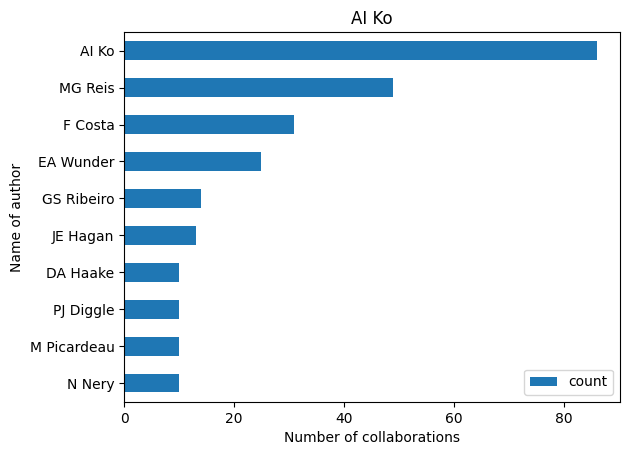

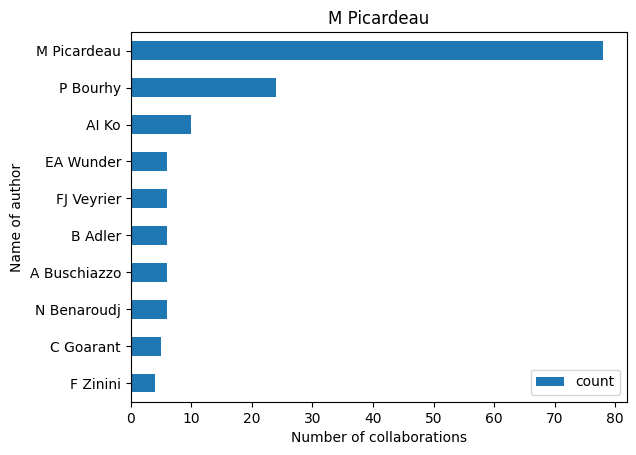

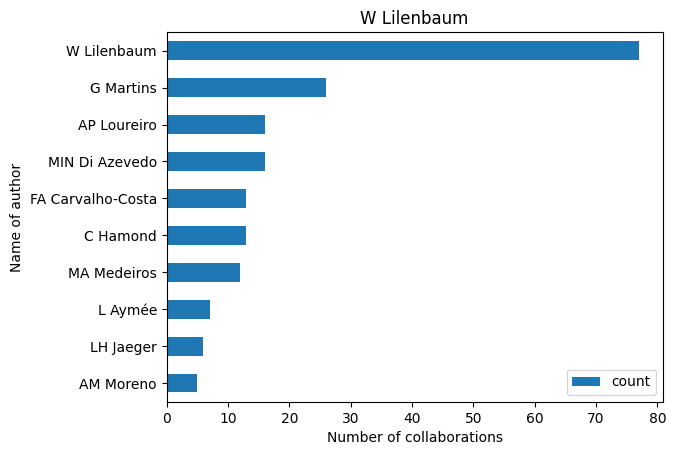

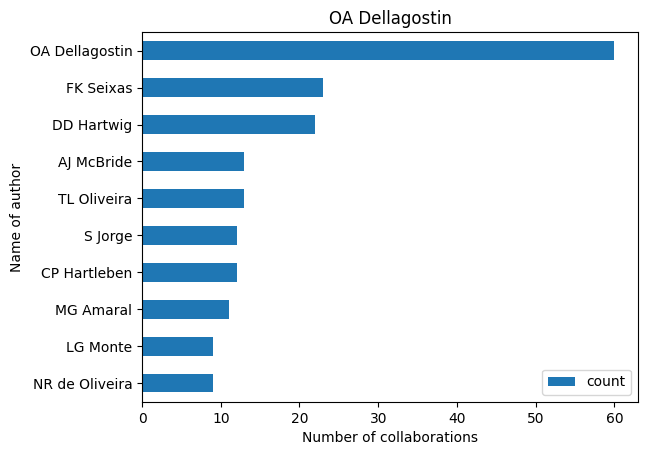

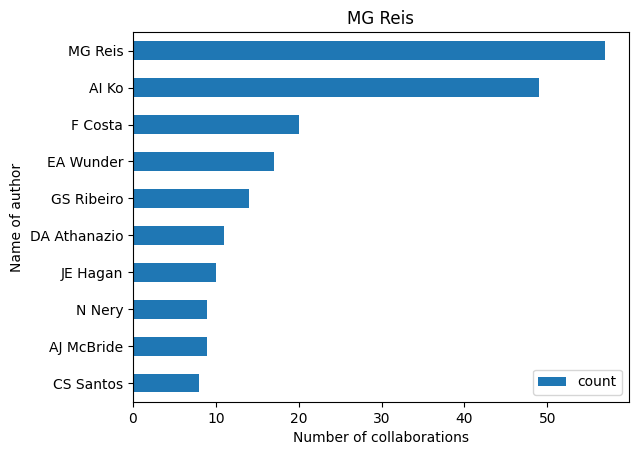

In [ ]:
#Loop for each top author
for i in range(5):
  #Dataframe containing all lines where the author is that top author
  df = pd.DataFrame(fullauthors[fullauthors["AuthorFullname"] == (frequentauthors["AuthorFullname"].iloc[i])])
  #Dataframe containing all papers that the author is involved with
  df2 = pd.DataFrame(fullauthors[fullauthors["PMID"].isin(df["PMID"])])

  #List containing the top 10 authors that collaborated with that author
  collablist = df2["AuthorFullname"].value_counts()[:10].reset_index().iloc[::-1]

  #Plotting a horizontal bar graph of the top collaborations with that author
  collablist.plot.barh(x="AuthorFullname")

  #Adding the title
  plt.title(frequentauthors["AuthorFullname"].iloc[i])
  #Adding the y-axis label
  plt.ylabel("Name of author")
  #Adding the x-axis label
  plt.xlabel("Number of collaborations")

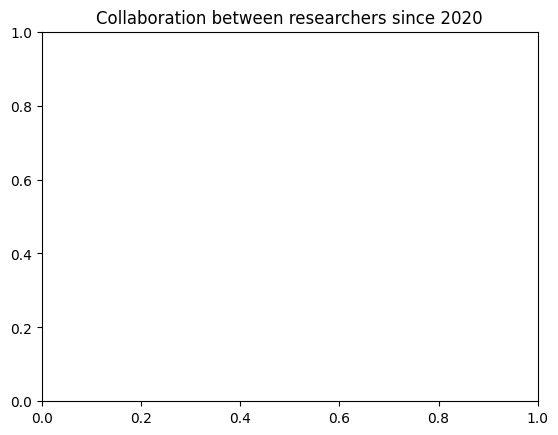

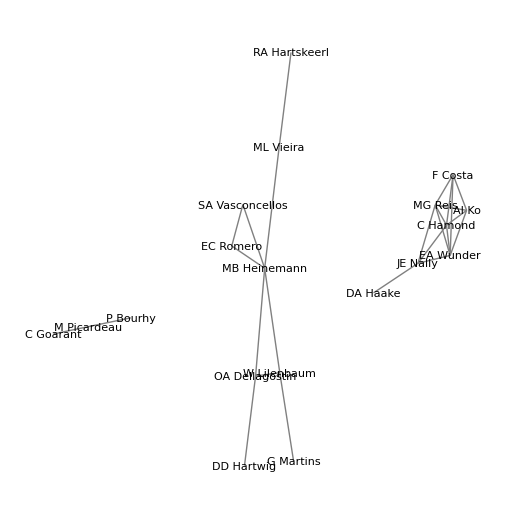

In [ ]:
#Identify the 10 authors who have published most articles
frequentauthors = (fullauthors['AuthorFullname'].value_counts()[:30]).reset_index()

#Empty dataframe for concatenating
fulldf = pd.DataFrame()

#Loop so each top 30 author will be added
for i in range(30):
  #Dataframe containing all lines where the author is that top 10 author
  df = pd.DataFrame(fullauthors[fullauthors["AuthorFullname"] == (frequentauthors["AuthorFullname"].iloc[i])])
  #Dataframe containing all of the papers where that author was listed
  df2 = pd.DataFrame(fullauthors[fullauthors["PMID"].isin(df["PMID"])])
  #Add a row with that author name
  df2["CopyName"] = frequentauthors["AuthorFullname"].iloc[i]
  #Dataframe containing all authors on those papers that are in the top 10 authors
  df3 = pd.DataFrame(df2[df2["AuthorFullname"].isin(frequentauthors["AuthorFullname"])])
  #Removing collaborations between the author and themself
  df3 = pd.DataFrame(df3[df3["AuthorFullname"] != df3["CopyName"]])
  #Dataframe containing only collaborations that happened since 2020
  df3 = pd.DataFrame(df3[df3["Year"]>=2020])

  #Concatenating that dataframe to the total dataframe
  fulldf = pd.concat([fulldf,df3])

#Creating the network of collaborations between authors
authornetwork = nx.from_pandas_edgelist(fulldf, 'CopyName', 'AuthorFullname')

#Adding title
plt.title("Collaboration between researchers since 2020")

#Setting the figure size
plt.figure(figsize=(5,5))

#Drawing the network and adjusting how it looks
nx.draw(authornetwork, with_labels=True,
        node_size=0,
        node_shape="o",
        node_color="black",
        #linewidths=1,
        width=1,
        font_size=8,
        font_color="black",
        edge_color="gray")

#Saving the network
plt.savefig("AuthorCollabRecentTotal.jpeg")

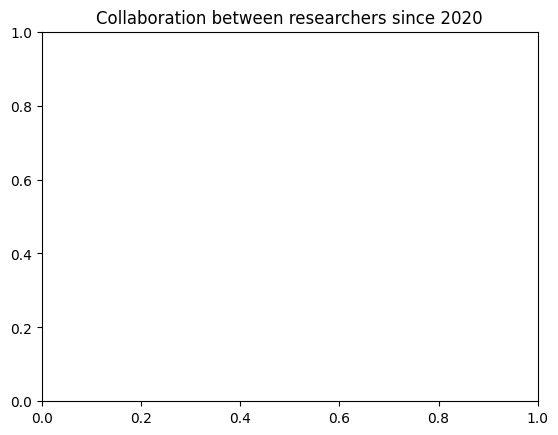

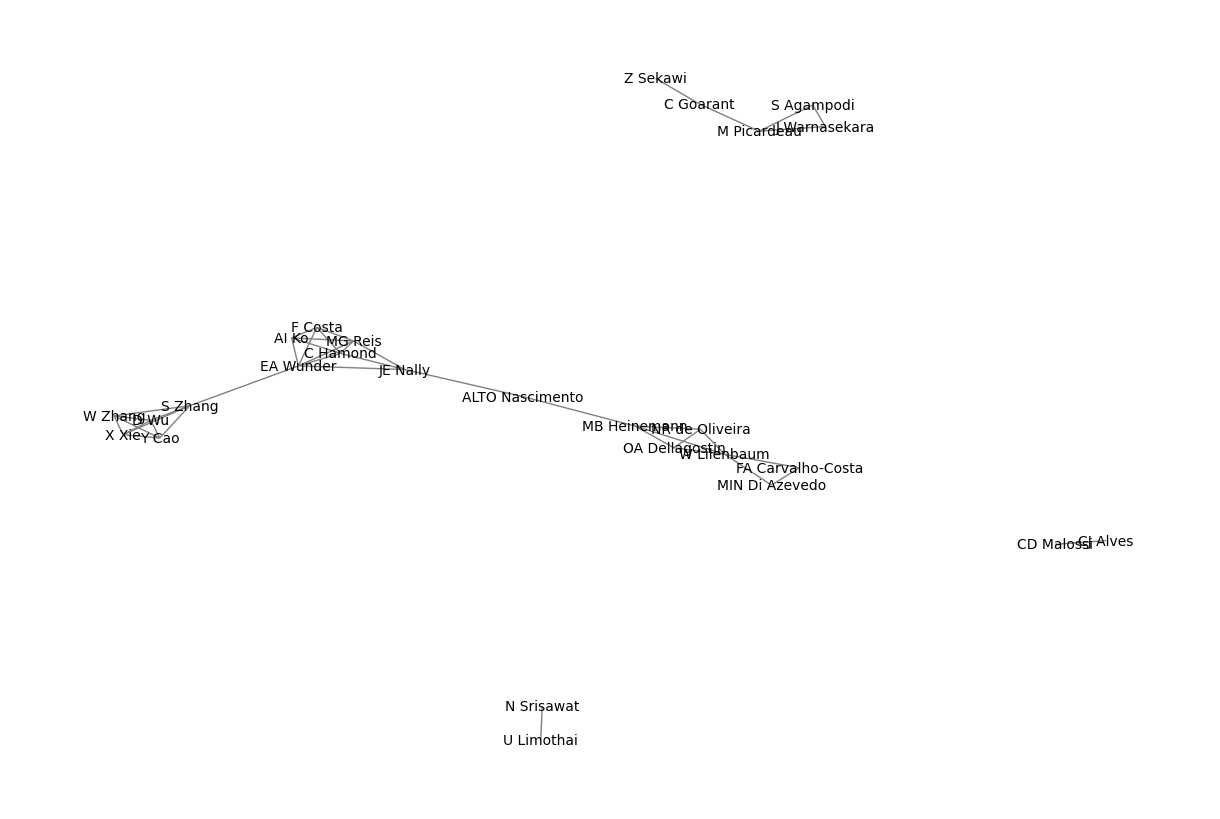

In [ ]:
#Identify the 30 authors who have published most articles since 2020
recentauthors = fullauthors[fullauthors["Year"]>=2020]
recentauthors = recentauthors["AuthorFullname"].value_counts()[:30].reset_index()

#Empty dataframe for concatenating
fulldf = pd.DataFrame()

#Loop so each top 30 author will be added
for i in range(30):
  #Dataframe containing all lines where the author is that top 10 author
  df = pd.DataFrame(fullauthors[fullauthors["AuthorFullname"] == (recentauthors["AuthorFullname"].iloc[i])])
  #Dataframe containing all of the papers where that author was listed
  df2 = pd.DataFrame(fullauthors[fullauthors["PMID"].isin(df["PMID"])])
  #Add a row with that author name
  df2["CopyName"] = recentauthors["AuthorFullname"].iloc[i]
  #Dataframe containing all authors on those papers that are in the top 10 authors
  df3 = pd.DataFrame(df2[df2["AuthorFullname"].isin(recentauthors["AuthorFullname"])])
  #Removing collaborations between the author and themself
  df3 = pd.DataFrame(df3[df3["AuthorFullname"] != df3["CopyName"]])
  #Dataframe containing only collaborations that happened since 2020
  df3 = pd.DataFrame(df3[df3["Year"]>=2020])

  #Concatenating that dataframe to the total dataframe
  fulldf = pd.concat([fulldf,df3])

#Creating the network of collaborations between authors
authornetwork = nx.from_pandas_edgelist(fulldf, 'CopyName', 'AuthorFullname')

#Adding title
plt.title("Collaboration between researchers since 2020")

#Setting the figure size
plt.figure(figsize=(12,8))

#Drawing the network and adjusting how it looks
nx.draw(authornetwork, with_labels=True,
        node_size=0,
        node_shape="o",
        node_color="black",
        linewidths=1,
        width=1,
        font_size=10,
        font_color="black",
        edge_color="gray")

#Saving the network
plt.savefig("AuthorCollabRecent.jpeg")